### **Airline Scheduling Problem using hill climbing**

## City Allocator

This part initializes 10 cities randomly.
In the City class:
1. expected_passengers is the passengers that a company can pick up from each city.
2. fuel_cost_per_liter is the rate or cost of fuel per liter in each city.
3. x and y are the coordinates of the city on the grid

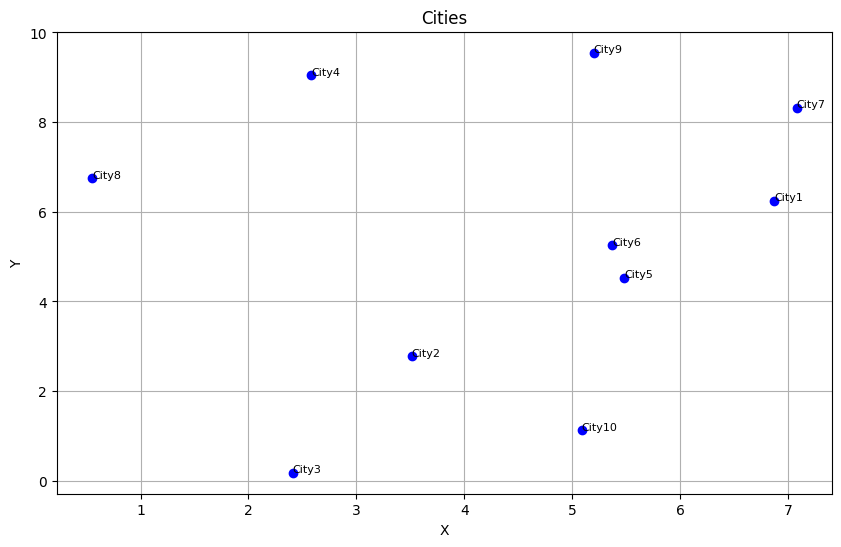

In [ ]:
import random
import matplotlib.pyplot as plt

class City:
    def __init__(self, name, expected_passengers, fuel_cost_per_liter, x, y):
        self.name = name
        self.expected_passengers = expected_passengers
        self.fuel_cost_per_liter = fuel_cost_per_liter
        self.x = x
        self.y = y

def generate_random_expected_passengers(companies):
    expected_passengers = {}
    for company in companies:
        expected_passengers[company] = random.randint(50, 300)  # Random number of passengers between 50 and 300
    return expected_passengers

# Initialize companies
companies = ["Company1", "Company2", "Company3", "Company4", "Company5"]

# Initialize cities
cities = []
for i in range(10):
    city_name = f"City{i+1}"
    expected_passengers = generate_random_expected_passengers(companies)
    fuel_cost_per_liter = random.uniform(1, 2)  # Random fuel cost per liter between $1 and $2
    x = random.uniform(0, 10)  # Random x-coordinate
    y = random.uniform(0, 10)  # Random y-coordinate
    cities.append(City(city_name, expected_passengers, fuel_cost_per_liter, x, y))

# Plot cities on a graph
plt.figure(figsize=(10, 6))
for city in cities:
    plt.scatter(city.x, city.y, color='blue')
    plt.text(city.x, city.y, city.name, fontsize=8)

plt.title('Cities')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [ ]:
for city in cities:
  print(city.name,'\t',city.fuel_cost_per_liter,'\t',city.expected_passengers)

City1 	 1.02416878950171 	 {'Company1': 225, 'Company2': 266, 'Company3': 224, 'Company4': 208, 'Company5': 289}
City2 	 1.7335293618395369 	 {'Company1': 224, 'Company2': 246, 'Company3': 199, 'Company4': 237, 'Company5': 54}
City3 	 1.4063371481713949 	 {'Company1': 75, 'Company2': 81, 'Company3': 142, 'Company4': 72, 'Company5': 202}
City4 	 1.5055118455935013 	 {'Company1': 136, 'Company2': 156, 'Company3': 114, 'Company4': 82, 'Company5': 300}
City5 	 1.4261655270487588 	 {'Company1': 152, 'Company2': 292, 'Company3': 201, 'Company4': 106, 'Company5': 172}
City6 	 1.1294287596516768 	 {'Company1': 182, 'Company2': 213, 'Company3': 158, 'Company4': 201, 'Company5': 214}
City7 	 1.468534962657693 	 {'Company1': 157, 'Company2': 221, 'Company3': 76, 'Company4': 280, 'Company5': 174}
City8 	 1.9955101441722825 	 {'Company1': 171, 'Company2': 229, 'Company3': 209, 'Company4': 274, 'Company5': 117}
City9 	 1.7889204979370106 	 {'Company1': 179, 'Company2': 156, 'Company3': 298, 'Company

## Flight Table Generator

This part initializes a table containing all possible flights in between all cities for each company.

In the Flight Class:
1. company_name is name of the company to which the flight is related.
2. origin_city is the starting point of the flight.
3. destination_city is the ending point of the flight.
4. travel_time is the flight time in hours.
5. crew_salary is hiring cost of the crew for that flight.
6. fuel_consumption is the liters of fuel consumed for that flight.

In [ ]:
import pandas as pd
from tabulate import tabulate

class Flight:
    def __init__(self, company_name, origin_city, destination_city, travel_time, crew_salary, fuel_consumption):
        self.company_name = company_name
        self.origin_city = origin_city
        self.destination_city = destination_city
        self.travel_time = travel_time
        self.crew_salary = crew_salary
        self.fuel_consumption = fuel_consumption

def generate_flights(cities, companies):
    flights = []
    for company in companies:
        for origin in cities:
            for destination in cities:
                if origin != destination:
                    travel_time = round(random.uniform(1, 5), 2)  # Random travel time between 1 and 5 hours
                    crew_salary = random.randint(200, 1000)  # Random crew salary between $200 and $1000
                    fuel_consumption = random.randint(100, 500)  # Random fuel consumption between 100 and 500 liters
                    flight = Flight(company, origin.name, destination.name, travel_time, crew_salary, fuel_consumption)
                    flights.append(flight)
    return flights

# Display flights in a table format
def display_flights_table(flights):
    table_data = []
    for flight in flights:
        row = [flight.company_name, flight.origin_city, flight.destination_city, flight.travel_time, flight.crew_salary, flight.fuel_consumption]
        table_data.append(row)
    headers = ["Company", "Origin City", "Destination City", "Travel Time (hours)", "Crew Salary ($)", "Fuel Consumption (liters)"]
    print(tabulate(table_data, headers=headers))

flights = generate_flights(cities, companies)
display_flights_table(flights)

Company    Origin City    Destination City      Travel Time (hours)    Crew Salary ($)    Fuel Consumption (liters)
---------  -------------  ------------------  ---------------------  -----------------  ---------------------------
Company1   City1          City2                                1.9                 782                          225
Company1   City1          City3                                3.25                931                          427
Company1   City1          City4                                2.93                431                          185
Company1   City1          City5                                4.6                 230                          407
Company1   City1          City6                                1.65                276                          287
Company1   City1          City7                                1.47                525                          160
Company1   City1          City8                                4.94     

In [ ]:
def calculate_total_cost(schedule, cities):
    # total_fuel_cost = 0
    # total_travel_time = 0
    # total_crew_salary = 0

    # current_city = None
    # for flight in schedule:
    #     if current_city is None:
    #         current_city = flight.origin_city
    #     if current_city != flight.origin_city:
    #         return float('inf'), float('inf'), float('inf')  # Invalid schedule, returning infinite cost

    #     destination_city = flight.destination_city
    #     cities[flight.origin_city].fuel_cost_per_liter * flight.fuel_consumption
    #     fuel_cost = 0 # cities[flight.origin_city].fuel_cost_per_liter * flight.fuel_consumption
    #     total_fuel_cost += fuel_cost
    #     total_travel_time += flight.travel_time
    #     total_crew_salary += flight.crew_salary

    #     current_city = destination_city

    # return total_fuel_cost, total_travel_time, total_crew_salary
    pass

def hill_climbing(cities, flights):
    # best_schedules = {}
    # for company_name in set(flight.company_name for flight in flights):
    #     current_schedule = generate_initial_schedule(company_name, flights)
    #     best_schedule = current_schedule
    #     best_cost = calculate_total_cost(best_schedule, cities)

    #     for _ in range(1000):  # Limiting iterations to avoid infinite loops
    #         neighbors = generate_neighbors(current_schedule)
    #         for neighbor in neighbors:
    #             neighbor_cost = calculate_total_cost(neighbor, cities)
    #             if neighbor_cost < best_cost:
    #                 best_schedule = neighbor
    #                 best_cost = neighbor_cost
    #         current_schedule = best_schedule

    #     best_schedules[company_name] = best_schedule

    # return best_schedules
    pass

def generate_initial_schedule(company_name, flights):
    # company_flights = [flight for flight in flights if flight.company_name == company_name]
    # random.shuffle(company_flights)
    # return company_flights
    pass

def generate_neighbors(schedule):
    # neighbors = []
    # for i in range(len(schedule)):
    #     for j in range(i + 1, len(schedule)):
    #         neighbor_schedule = schedule[:]
    #         neighbor_schedule[i], neighbor_schedule[j] = neighbor_schedule[j], neighbor_schedule[i]
    #         neighbors.append(neighbor_schedule)
    # return neighbors
    pass

# Apply hill climbing to find optimal schedules for each company
best_schedules = hill_climbing({city.name: city for city in cities}, flights)


In [ ]:
def display_company_flights(data):
    for company, flights in data.items():
        print("\n" + company + "\n---------")
        if flights:
            display_flights_table(flights)
            print("---------\n")
        else:
            print("No flights available for this company")

display_company_flights(best_schedules)

In [ ]:
def plot_flight_path(flights, cities):
    # city_coordinates = {city.name: (city.x, city.y) for city in cities}
    # color_map = plt.cm.get_cmap('hsv', len(flights) + 1)

    # for city_name, (x, y) in city_coordinates.items():
    #     plt.plot(x, y, 'bo')
    #     plt.text(x, y, city_name, fontsize=8)

    # for i, flight in enumerate(flights):
    #     origin_coords = city_coordinates[flight.origin_city]
    #     dest_coords = city_coordinates[flight.destination_city]
    #     plt.plot([origin_coords[0], dest_coords[0]], [origin_coords[1], dest_coords[1]], color=color_map(i), linestyle='-', marker='o')
    #     plt.text(dest_coords[0], dest_coords[1], str(i+1))

    # plt.xlabel('X')
    # plt.ylabel('Y')
    # plt.title(f'Flight Path for {flights[0].company_name}')
    # plt.grid(True)
    # plt.show()
    pass

# Plot flight paths for each company
for company, schedule in best_schedules.items():
    plot_flight_path(schedule, cities)
